In [1]:
from CellSeg.skel import Skel
from CellSeg.utils import clean_skeleton

import os
from skimage import io
import numpy as np
import pandas as pd
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)

In [2]:
# directory='/home/admin-suz/Documents/testCellSeg/TestSPIM/'
# # import image
# skeleton = Skel(os.path.join(directory,'C1-20191112_SQHrfp-EcadGFP_DLG647_180degre_04-1.fits_c100.up.NDskl.a.NDskl'))

directory='/home/admin-suz/Documents/testCellSeg/Test1/'
skeleton = Skel(os.path.join(directory,'im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl'))

if skeleton.isValid():
    skeleton.write_vtp(os.path.join(directory, "image_original.vtp"))
else:
    raise nameError('skeleton not valid')   
    
# lecture de l'image tif, pour récupérer le ratio depth/xy pixel

reading: 3763 critical points
reading: 3648 filaments
reading: critical points data
critical points done
reading: filaments data
Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/image_original.vtp 



In [3]:
clean_skeleton(skeleton)

Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl/_removefil.vtp 



In [4]:
#comptage du nombre de filament partant des points critiques
n_fil = []
for c in skeleton.crit:
    n_fil.append(c.nfil)
    
for i in np.unique(n_fil):
    print(i, n_fil.count(i))

2 1731
3 158
4 21


In [11]:
data_crit = []

for c in skeleton.crit:
    data_crit.append(
        {
            "id":c,
            "x": c.pos[0],
            "y": c.pos[1],
            "z": c.pos[2] * 0.22/0.18,
            "n_fil": c.nfil,
            "val": int(c.val),
            "pair": c.pair,
            "type":int(c.typ),
            "destCritId_addr":c.destCritId,
            "filId":c.filId,
        }
    )

data_crit = pd.DataFrame.from_records(data_crit)
tmp_id = []
for ci in data_crit['destCritId_addr'].values:
    tmp=[]
    for c in ci:
        tmp.append(data_crit[data_crit['id']==c].index.to_numpy()[0])
        
    tmp_id.append(tmp)

data_crit['destCritId'] = tmp_id
data_crit.head()

,id,x,y,z,n_fil,val,pair,type,destCritId_addr,filId,destCritId
0,<CellSeg.skel.CriticalPoint object at 0x7fa101...,312.0,46.0,11.0,2,4184,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835a...,"[906, 922]"
1,<CellSeg.skel.CriticalPoint object at 0x7fa101...,307.0,47.0,11.0,2,3441,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835a...,"[907, 922]"
2,<CellSeg.skel.CriticalPoint object at 0x7fa101...,336.0,49.0,11.0,2,10609,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835a...,"[908, 909]"
3,<CellSeg.skel.CriticalPoint object at 0x7fa101...,261.0,140.0,11.0,3,10965,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835e...,"[914, 915, 949]"
4,<CellSeg.skel.CriticalPoint object at 0x7fa101...,259.0,142.0,11.0,2,9023,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835f...,"[915, 950]"


In [12]:
data_fil = []

for f in skeleton.fil:
    data_fil.append(
        {
            "id":f,
            "cp1_add": f.cp1,
            "cp2_add": f.cp2,
            "cp1": data_crit[data_crit['id']==f.cp1].index.to_numpy()[0],
            "cp2": data_crit[data_crit['id']==f.cp2].index.to_numpy()[0],
            "points": f.points
            
        }
    )

data_fil = pd.DataFrame.from_records(data_fil)
data_fil.head()

,id,cp1_add,cp2_add,cp1,cp2,points
0,<CellSeg.skel.Filament object at 0x7fa1018359d0>,<CellSeg.skel.CriticalPoint object at 0x7fa101...,<CellSeg.skel.CriticalPoint object at 0x7fa101...,905,5,"[[254.0, 152.5, 8.0], [254.0, 151.5, 8.0], [25..."
1,<CellSeg.skel.Filament object at 0x7fa1018357d0>,<CellSeg.skel.CriticalPoint object at 0x7fa101...,<CellSeg.skel.CriticalPoint object at 0x7fa101...,905,6,"[[254.0, 152.5, 8.0], [254.0, 153.5, 8.5], [25..."
2,<CellSeg.skel.Filament object at 0x7fa101835950>,<CellSeg.skel.CriticalPoint object at 0x7fa101...,<CellSeg.skel.CriticalPoint object at 0x7fa101...,906,11,"[[315.5, 47.0, 9.0], [316.5, 47.0, 9.0], [317...."
3,<CellSeg.skel.Filament object at 0x7fa101835a10>,<CellSeg.skel.CriticalPoint object at 0x7fa101...,<CellSeg.skel.CriticalPoint object at 0x7fa101...,906,0,"[[315.5, 47.0, 9.0], [314.5, 46.5, 9.0], [313...."
4,<CellSeg.skel.Filament object at 0x7fa101835ad0>,<CellSeg.skel.CriticalPoint object at 0x7fa101...,<CellSeg.skel.CriticalPoint object at 0x7fa101...,907,1,"[[301.5, 49.0, 9.0], [302.5, 49.0, 9.0], [303...."


In [63]:
#test1 a grande échelle... 
# ne marche pas... 
data_crit_new = data_crit[data_crit.n_fil>2]
data_crit_new.reset_index(inplace=True, drop=False)


#boucle sur les cp connecté à 3 filaments et plus
for cp in range(len(data_crit_new)):
    print('\n\n')
    print(cp)
        
    new_dest_crit_id =[]
    # boucle sur les points critiques à l'autre extrémité des filaments
    for f_id in range(len(data_crit_new.loc[cp]['destCritId'])):
        c = data_crit_new.loc[cp]['destCritId'][f_id]

        new_f = data_fil[data_fil.id==data_crit_new.loc[cp]['filId'][f_id]]
        new_f_id = new_f.index[0]
        cpt = 0
        while ((data_crit.loc[c]['n_fil']==2 and (data_crit_new[data_crit_new['index']==c].shape[0]==0)) and (cpt < 20)):
            print(c, data_crit.loc[c]['n_fil'], data_crit_new[data_crit_new['index']==c].shape[0])
            c_1 = c
            c = data_crit.loc[c]['destCritId'][0]
            if data_crit.loc[c]['destCritId'][0]==c_1:
                c = data_crit.loc[c]['destCritId'][1]

            f=data_fil[data_fil.id==data_crit.loc[c]['filId'][0]]


            res = np.append(new_f['points'].to_numpy()[0],f['points'].to_numpy()[0])
            res = res.reshape(int(res.shape[0]/3),3)
            res = [res]
            new_f['points']=res
            cpt+=1

        print(c, data_crit.loc[c]['n_fil'], data_crit_new[data_crit_new['index']==c].shape[0])
        f=data_fil[data_fil.id==data_crit.loc[c]['filId'][0]]

        res = np.append(new_f['points'].to_numpy()[0],f['points'].to_numpy()[0])
        res = res.reshape(int(res.shape[0]/3),3)
        res = [res]
        new_f['points']=res
        new_dest_crit_id.append(c)

    data_crit_new.loc[cp]['destCritId']=new_dest_crit_id




0
914 2 0
915 2 0
950 2 0
951 2 0
5 2 0
6 3 1
915 2 0
950 2 0
951 2 0
5 2 0
6 3 1
949 2 0
3 3 1



1
905 2 0
951 2 0
5 2 0
6 3 1
916 2 0
918 2 0
919 2 0
920 2 0
9 2 0
8 2 0
7 2 0
6 3 1
917 2 0
6 3 1



2
910 2 0
924 2 0
15 3 1
924 2 0
15 3 1
926 2 0
930 2 0
24 3 1



3
908 2 0
909 2 0
925 2 0
13 2 0
2 2 0
16 3 1
923 2 0
16 3 1
928 2 0
16 3 1



4
912 2 0
939 2 0
28 2 0
24 3 1
930 2 0
24 3 1
938 2 0
27 2 0
935 2 0
936 2 0
58 3 1



5
939 2 0
28 2 0
24 3 1


/home/admin-suz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/admin-suz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/admin-suz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guid

972 2 0
29 3 1
974 2 0
29 3 1



6
952 2 0
953 2 0
43 3 1
953 2 0
43 3 1
954 2 0
1011 2 0
1012 2 0
90 2 0
88 2 0
43 3 1



7
921 2 0
1009 2 0
1076 2 0
87 2 0
47 3 1
1009 2 0
1076 2 0
87 2 0
47 3 1
1014 2 0
47 3 1



8
911 2 0
925 2 0
13 2 0
2 2 0
16 3 1
933 2 0
965 2 0
968 2 0
969 2 0
1018 2 0
1131 2 0
195 2 0
194 2 0
1129 2 0
1183 2 0
248 2 0
194 2 0
1129 2 0
1183 2 0
248 2 0
194 2 0
1129 2 0
1183 2 0
248 2 0
194 2 0
1129 2 0
961 2 0
50 2 0
49 2 0
958 2 0
961 2 0
50 2 0
49 2 0
958 2 0
961 2 0
50 2 0
49 2 0
958 2 0
961 2 0
50 2 0
49 2 0
958 2 0
961 2 0
50 2 0
49 2 0
958 2 0
961 2 0
964 2 0
52 4 1



9
934 2 0
936 2 0
58 3 1
936 2 0
58 3 1
937 2 0
970 2 0
973 2 0
1022 2 0
98 2 0
1019 2 0
97 2 0
96 2 0
56 2 0
54 2 0
53 2 0
963 2 0
966 2 0
967 2 0
1017 2 0
1019 2 0
97 2 0
96 2 0
56 2 0
54 2 0
53 2 0



10
980 2 0
981 2 0
67 3 1
981 2 0
67 3 1
982 2 0
983 2 0
986 2 0
122 2 0
68 2 0
67 3 1



11
913 2 0
990 2 0
75 3 1
985 2 0
70 3 1
987 2 0
71 2 0
32 2 0
31 2 0
940 2 0
941 2 0
987 2 0
71 2 

1247 2 0
1310 2 0
359 2 0
304 3 1
1248 2 0
284 2 0
1218 2 0
305 3 1



59
1217 2 0
245 2 0
192 2 0
1082 2 0
158 2 0
157 4 1
1218 2 0
305 3 1
1273 2 0
1289 2 0
1365 2 0
1426 2 0
1487 2 0
501 2 0
446 2 0
381 3 1



60
1182 2 0
1220 2 0
306 3 1
1220 2 0
306 3 1
1274 2 0
306 3 1



61
1184 2 0
1185 2 0
1186 2 0
251 3 1
1250 2 0
309 3 1
1276 2 0
1277 2 0
327 2 0
309 3 1



62
1216 2 0
281 2 0
1175 2 0
239 2 0
1121 2 0
155 2 0
1077 2 0
89 2 0
1010 2 0
44 2 0
953 2 0
43 3 1
1246 2 0
323 3 1
1271 2 0
1346 2 0
1347 2 0
379 3 1



63
1229 2 0
1232 2 0
331 4 1
1232 2 0
331 4 1
1330 2 0
331 4 1
1331 2 0
331 4 1



64
1261 2 0
1280 2 0
333 3 1
1280 2 0
333 3 1
1281 2 0
1300 2 0
334 2 0
1262 2 0
1263 2 0
319 2 0
334 2 0
1262 2 0
1263 2 0
319 2 0
334 2 0
1262 2 0
1263 2 0
319 2 0
334 2 0
1262 2 0
1263 2 0
319 2 0
334 2 0
1262 2 0
1263 2 0



65
1264 2 0
1266 2 0
1283 2 0
337 2 0
336 3 1
1265 2 0
298 2 0
206 2 0
1140 2 0
1265 2 0
298 2 0
206 2 0
1140 2 0
1265 2 0
298 2 0
206 2 0
1140 2 0
1265 2 0
298 

1554 2 0
583 3 1



112
1509 2 0
1560 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
1560 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
576 2 0
577 2 0
564 2 0
1531 2 0
1544 2 0
1561 2 0
576 2 0
1571 2 0
1589 2 0
1614 2 0
613 2 0
595 2 0
563 4 1
1583 2 0
1603 2 0
1669 2 0
1733 2 0
720 3 1



113
1496 2 0
1516 2 0
571 3 1
1516 2 0
571 3 1
1566 2 0
1629 2 0
637 2 0
571 3 1



114
1526 2 0
1527 2 0
572 3 1
1527 2 0
572 3 1
1578 2 0
572 3 1



115
1520 2 0
1553 2 0
574 3 1
1553 2 0
574 3 1
1569 2 0
1602 2 0
621 3 1



116
1525 2 0
546 2 0
523 3 1
1577 2 0
1609 2 0
1617 2 0
655 3 1
1584 2 0
579 3 1



117
1539 2 0
538 2 0
487 3 1
1550 2 0
1610 2 0
628 2 0
1599 2 0
1632 2 0
642 2 0
628 2 0
1599 2 0
1632 2 0
642 2 0
628 2 0
1599 2 0
1632 2 0
642 2 0
628 2 0
1599 2 0
1632 2 0
642 2 0
628 2 0
1599 2 0
1632 2 0

752 3 1
1860 2 0
872 3 1
1867 2 0
840 3 1



174
1817 2 0
1846 2 0
854 3 1
1846 2 0
854 3 1
1864 2 0
854 3 1



175
1855 2 0
1886 2 0
866 3 1
1886 2 0
866 3 1
1902 2 0
866 3 1



176
1857 2 0
1858 2 0
869 4 1
1858 2 0
869 4 1
1876 2 0
869 4 1
1887 2 0
1901 2 0
900 2 0
1900 2 0
1909 2 0
901 2 0
872 3 1



177
1848 2 0
1853 2 0
841 2 0
872 3 1
1860 2 0
872 3 1
1888 2 0
1909 2 0
901 2 0
872 3 1



178
1869 2 0
1874 2 0
902 3 1
1874 2 0
902 3 1
1896 2 0
902 3 1


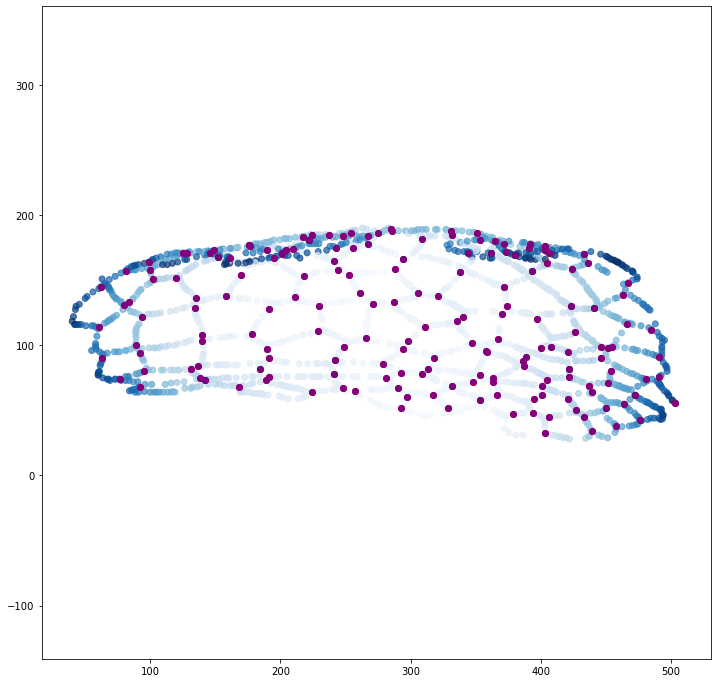

In [62]:
fig, ax = plt.subplots()

ax.scatter(data_crit.x, data_crit.y, c=data_crit.z, cmap='Blues', alpha=0.7)

#ax.scatter(data_crit.loc[[0,3]]['x'], data_crit.loc[[0,3]]['y'], color='red')

data_crit_2 = data_crit[data_crit.n_fil==3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'red')

data_crit_2 = data_crit[data_crit.n_fil>3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'black')

ax.scatter(data_crit_new.x, data_crit_new.y, color = 'purple')
ax.axis('equal')

# ax.set_xlim(300, 400)
# ax.set_ylim(50, 100)
fig.set_size_inches(12, 12)


In [69]:
data_crit_new

,index,id,x,y,z,n_fil,val,pair,type,destCritId_addr,filId,destCritId
0,3,<CellSeg.skel.CriticalPoint object at 0x7fa101...,261.0,140.0,11.000000,3,10965,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835e...,"[914, 915, 949]"
1,6,<CellSeg.skel.CriticalPoint object at 0x7fa101...,253.0,154.0,11.000000,3,7354,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa1018357...,"[905, 916, 917]"
2,15,<CellSeg.skel.CriticalPoint object at 0x7fa101...,293.0,52.0,12.222222,3,11917,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa1018358...,"[910, 924, 926]"
3,16,<CellSeg.skel.CriticalPoint object at 0x7fa101...,329.0,52.0,12.222222,3,16346,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa1018358...,"[908, 923, 928]"
4,24,<CellSeg.skel.CriticalPoint object at 0x7fa101...,297.0,60.0,12.222222,3,18735,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101835b...,"[912, 930, 938]"
...,...,...,...,...,...,...,...,...,...,...,...,...
174,854,<CellSeg.skel.CriticalPoint object at 0x7fa101...,161.0,167.0,90.444444,3,19304,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101778f...,"[1817, 1846, 1864]"
175,866,<CellSeg.skel.CriticalPoint object at 0x7fa101...,99.0,164.0,92.888889,3,17631,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101774b...,"[1855, 1886, 1902]"
176,869,<CellSeg.skel.CriticalPoint object at 0x7fa101...,380.0,169.0,92.888889,4,10441,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa10178ae...,"[1857, 1858, 1876, 1887]"
177,872,<CellSeg.skel.CriticalPoint object at 0x7fa101...,406.0,171.0,94.111111,3,10619,<CellSeg.skel.CriticalPoint object at 0x7fa101...,3,[<CellSeg.skel.CriticalPoint object at 0x7fa10...,[<CellSeg.skel.Filament object at 0x7fa101785f...,"[1848, 1860, 1888]"


In [67]:
# data_crit_new = data_crit[data_crit.n_fil>2]
# data_crit_new.reset_index(inplace=True, drop=False)

data_fil_new=[]

for c in data_crit_new.itertuples():
    try:
        fil = data_fil[(data_fil.cp1==c.pair) & (data_fil.cp2==c.index)]
        cp_pair = c.pair
        
    except:
        pass
    
    try:
        fil_tmp = data_fil[(data_fil.cp1==data_crit.loc[cp_pair]['pair']) 
                       & (data_fil.cp2==cp_pair)]
        fil['points'] = np.concatenate((fil['points'].to_numpy()[0], fil_tmp['points'].to_numpy()[0]))
    except:
        pass
    cp_pair = data_crit.loc[cp_pair]['pair']

    data_fil_new.append(fil.to_dict())
data_fil_new = pd.DataFrame.from_records(data_fil_new)

KeyError: <CellSeg.skel.CriticalPoint object at 0x7fa1019de0d0>

In [68]:
connected = data[data.n_fil>2]
fig, ax = plt.subplots()

ax.scatter(data.x, data.y, c=data.z, cmap='Blues', alpha=0.1)

#ax.scatter(connected.x, connected.y, c=connected.z, cmap='winter', marker='+', s=80)
ax.scatter(connected.x, connected.y, c=connected.type, cmap='winter', marker='+', s=80)
connected = data[data.n_fil==2]
#ax.scatter(connected.x, connected.y, c=connected.type, cmap='Reds', marker='.', s=80)
ax.axis('equal')
fig.set_size_inches(12, 12)


NameError: name 'data' is not defined

In [ ]:
import ipyvolume as ipv
from matplotlib import cm

cmap = cm.get_cmap("viridis")
colors = cmap((data.z-data.z.min())/(data.z.max()-data.z.min()))

ipv.clear()
ipv.scatter(x=np.array(data.x)*10, y=np.array(data.y)*10, z=data.z*10, size=1, color=colors, marker='circle_2d')
ipv.squarelim()
ipv.show()